In [ ]:

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)

Current Working Directory: /content/drive/MyDrive/Colab Notebooks


In [ ]:
#change the working directory to a different path
#os.chdir(r'C:\Users\madal\Desktop\MSc-Data-Science\Thesis')

In [ ]:
#import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import math
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_recall_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


In [ ]:
#learning curve function
def plot_learning_curve(model, X, y, scoring, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring=scoring, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


In [ ]:
#set random seed
np.random.seed(42)

In [37]:
#load pre-saved datasets

##import data = smote

#X_train_resampled = pd.read_csv('X_train_transformed_smote.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basicfull.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')

#y_train_resampled = pd.read_csv('y_train_smote.csv')
y_valid = pd.read_csv('y_valid_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
#y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)


In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

In [ ]:
#KNN with smote, 1/7


In [ ]:
# Create a pipeline with a StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_dist = {
    'knn__n_neighbors': randint(1, 20),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]  # Power parameter for Minkowski distance
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings sampled
    scoring='f1_macro',  # Use an appropriate scoring metric
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters KNN smote:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_model, 'knn_smote.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=21.4min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=21.3min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=21.3min
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=187.4min
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=187.5min
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=187.5min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=21.2min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=21.2min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=21.1min
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=187.0min
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=188.1min
[CV] END knn__n_neighbors=11, knn__p=1,

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-ee5bd0b43fff>", line 44, in <cell line: 44>
    joblib.dump(best_model, 'knn_smote.pkl')
  File "/usr/local/lib/python3.10/dist-packages/joblib/numpy_pickle.py", line 552, in dump
    with open(filename, 'wb') as f:
OSError: [Errno 107] Transport endpoint is not connected: 'knn_smote.pkl'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/

In [ ]:
###best hyperparameters KNN smote - make the model & save

In [ ]:
#best hyperparameters per search above
knn_hyperparameters = {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

#k-NN classifier
knn_model = KNeighborsClassifier(
    n_neighbors=knn_hyperparameters['n_neighbors'],
    p=knn_hyperparameters['p'],
    weights=knn_hyperparameters['weights']
)

In [ ]:
# Create a pipeline with k-NN
pipeline = Pipeline([
    ('knn', knn_model)
])

# Fit the model to your training data
# Assuming X_train is your training data and y_train is your training labels
best_model = pipeline.fit(X_train_resampled, y_train_resampled)

# Predict with the trained model
# Assuming X_test is your test data
y_pred = pipeline.predict(X_valid_transformed)

In [ ]:
#save model to a file
joblib.dump(best_model, 'knn_smote.pkl')

['knn_smote.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5235


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9536


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[148039  10285]
 [  1150    526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    158324
           1       0.05      0.31      0.08      1676

    accuracy                           0.93    160000
   macro avg       0.52      0.62      0.52    160000
weighted avg       0.98      0.93      0.95    160000



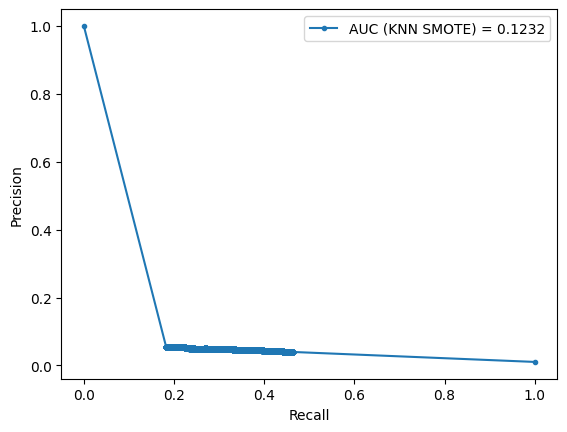

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_model.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision, recall, _ = precision_recall_curve(y_valid, probabilities)
auc = auc(recall, precision)

# Plot the precision-recall curve

plt.plot(recall, precision, marker=".", label=f"AUC (KNN SMOTE) = {auc:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
average_precision = average_precision_score(y_valid, probabilities)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0289


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.96
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.93
Class macro: F1 Score = 0.52
Class weighted: F1 Score = 0.95


In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_model, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_model.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_model.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

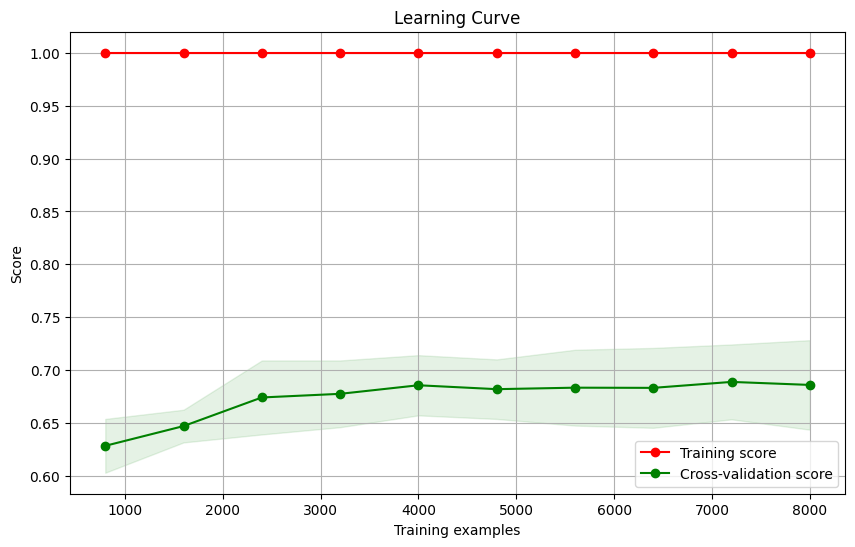

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_model.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



In [ ]:
##KNN with ADASYN

X_train_resampled = pd.read_csv('X_train_transformed_adasyn.csv')

y_train_resampled = pd.read_csv('y_train_adasyn.csv')

y_train_resampled = np.ravel(y_train_resampled.values)


In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
##50% of dataset used for tuning

# Assuming X and y are your features and labels
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(X_train_resampled, y_train_resampled, test_size=0.5, random_state=42)


In [ ]:

# Create a pipeline with a StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_dist = {
    'knn__n_neighbors': [1, 2, 3, 4, 5, 7, 10],  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]  # Power parameter for Minkowski distance
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings sampled
    scoring='f1_macro',  # Use an appropriate scoring metric
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train_tune, y_train_tune)

# Print the best hyperparameters
print("Best Hyperparameters KNN adasyn:", random_search.best_params_)

#fit the model on full data
best_params = random_search.best_params_
best_model = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=best_params['knn__n_neighbors'],
                                  weights=best_params['knn__weights'],
                                  p=best_params['knn__p']))
])

# Fit the final model on the full dataset
best_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_model.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_model, 'knn_adasyn.pkl')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=71.9min
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=72.1min
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=71.5min
[CV] END knn__n_neighbors=10, knn__p=1, knn__weights=distance; total time=71.7min
[CV] END knn__n_neighbors=10, knn__p=1, knn__weights=distance; total time=71.5min
[CV] END knn__n_neighbors=10, knn__p=1, knn__weights=distance; total time=71.9min
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=71.7min
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=71.4min
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=71.3min
[CV] END knn__n_neighbors=7, knn__p=1, knn__weights=distance; total time=71.0min
[CV] END knn__n_neighbors=7, knn__p=1, knn__weights=distance; total time=70.4min
[CV] END knn__n_neighbors=7, knn__p=1, knn__we

In [ ]:
#best hyperparameters per search above
knn_hyperparameters = {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

#k-NN classifier
knn_model = KNeighborsClassifier(
    n_neighbors=knn_hyperparameters['n_neighbors'],
    p=knn_hyperparameters['p'],
    weights=knn_hyperparameters['weights']
)

In [ ]:
# Create a pipeline with k-NN
pipeline = Pipeline([
    ('knn', knn_model)
])

# Fit the model to your training data
# Assuming X_train is your training data and y_train is your training labels
best_model = pipeline.fit(X_train_resampled, y_train_resampled)

# Predict with the trained model
# Assuming X_test is your test data
y_pred = best_model.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_model, 'knn_adasyn.pkl')

['knn_adasyn.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5416


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9775


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[155635   2689]
 [  1455    221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    158324
           1       0.08      0.13      0.10      1676

    accuracy                           0.97    160000
   macro avg       0.53      0.56      0.54    160000
weighted avg       0.98      0.97      0.98    160000



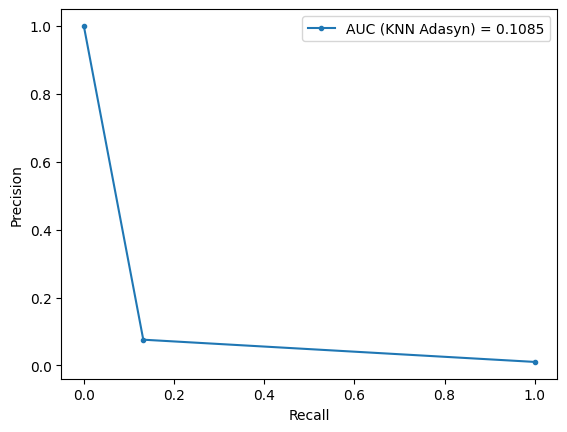

In [ ]:
# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_model.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (KNN Adasyn) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
average_precision = average_precision_score(y_valid, probabilities)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0191


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.10
Class accuracy: F1 Score = 0.97
Class macro: F1 Score = 0.54
Class weighted: F1 Score = 0.98


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_logistic_regression.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_model, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_model.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



In [ ]:
##KNN random undersampling 3/7
X_train_undersampled = pd.read_csv('X_train_random_undersampl.csv')

y_train_undersampled = pd.read_csv('y_train_random_undersampl.csv')

y_train_undersampled = np.ravel(y_train_undersampled.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_undersampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
# Create a pipeline with a StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_dist = {
    'knn__n_neighbors': randint(1, 20),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]  # Power parameter for Minkowski distance
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings sampled
    scoring='f1_macro',  # Use an appropriate scoring metric
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train_undersampled, y_train_undersampled)

# Print the best hyperparameters
print("Best Hyperparameters KNN random undersampling:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_model, 'knn_random_undersampl.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   2.1s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   1.9s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   1.3s
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=   2.9s
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=   2.2s
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=   2.2s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   0.4s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   0.4s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   0.4s
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=   3.6s
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=   2.9s
[CV] END knn__n_neighbors=11, knn__p=1, knn_

['knn_random_undersampl.pkl']

In [36]:
best_model = joblib.load('knn_random_undersampl.pkl')

In [38]:
y_pred = best_model.predict(X_valid_transformed)

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4553


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8410


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

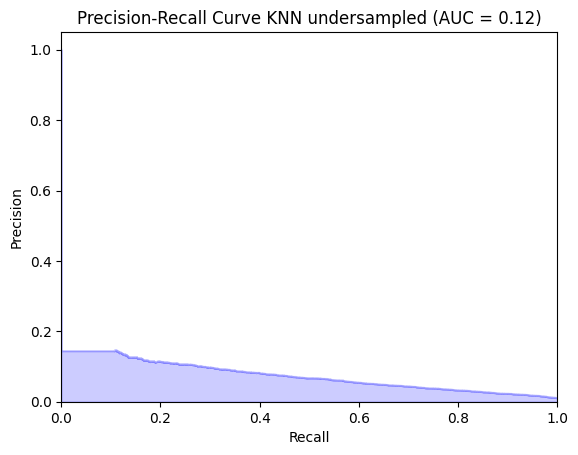

Area Under the Curve KNN undersampled (AUC): 0.1190


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_model.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (KNN, random undersampling) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
average_precision = average_precision_score(y_valid, y_pred)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0278


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.85
Class 1: F1 Score = 0.06
Class accuracy: F1 Score = 0.74
Class macro: F1 Score = 0.46
Class weighted: F1 Score = 0.84


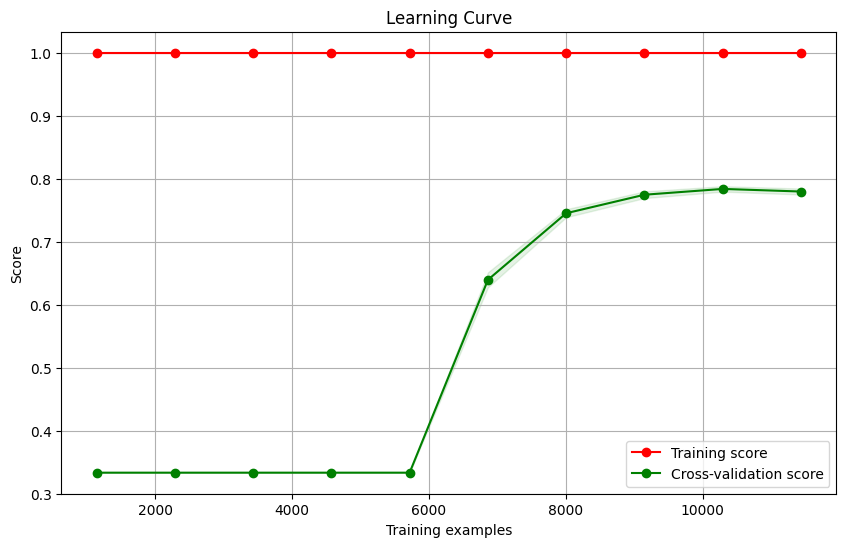

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_model, X_train_undersampled, y_train_undersampled, scoring, train_sizes)

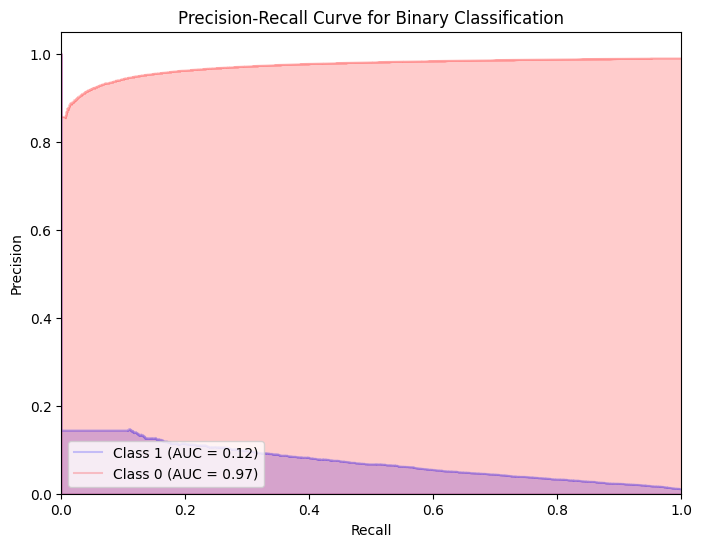

AUC Class 1: 0.1190
AUC Class 0: 0.9721


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_model.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_model.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_model.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.006770925444026174
Recall: 0.10739856801909307
[[157252   1072]
 [  1496    180]]


In [ ]:
##KNN stratified undersampling 4/7

X_train_undersampled = pd.read_csv('X_train_undersampled_str.csv')

y_train_undersampled = pd.read_csv('y_train_undersampled_str.csv')

y_train_undersampled = np.ravel(y_train_undersampled.values)


In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_undersampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")


Number of features is the same in training and validation sets.


In [ ]:
# Create a pipeline with a StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_dist = {
    'knn__n_neighbors': randint(1, 20),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]  # Power parameter for Minkowski distance
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings sampled
    scoring='f1_macro',  # Use an appropriate scoring metric
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train_undersampled, y_train_undersampled)

# Print the best hyperparameters
print("Best Hyperparameters KNN stratified undersampling:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   0.4s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   0.4s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   0.4s
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=   2.4s
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=   2.1s
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=   3.6s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   1.5s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   1.0s
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time=   1.2s
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=   2.4s
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=   2.1s
[CV] END knn__n_neighbors=11, knn__p=1, knn_

In [ ]:
#save model to a file
joblib.dump(best_model, 'knn_stratified_undersampl.pkl')

['knn_stratified_undersampl.pkl']

In [16]:
best_model = joblib.load('knn_stratified_undersampl.pkl')

In [17]:
y_pred = best_model.predict(X_valid_transformed)

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4449


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8209


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[112185  46139]
 [   174   1502]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    158324
           1       0.03      0.90      0.06      1676

    accuracy                           0.71    160000
   macro avg       0.51      0.80      0.44    160000
weighted avg       0.99      0.71      0.82    160000



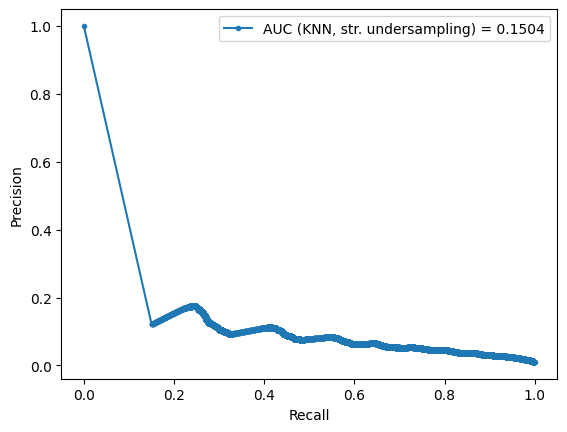

In [19]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_model.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (KNN, str. undersampling) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0293


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.83
Class 1: F1 Score = 0.06
Class accuracy: F1 Score = 0.71
Class macro: F1 Score = 0.44
Class weighted: F1 Score = 0.82


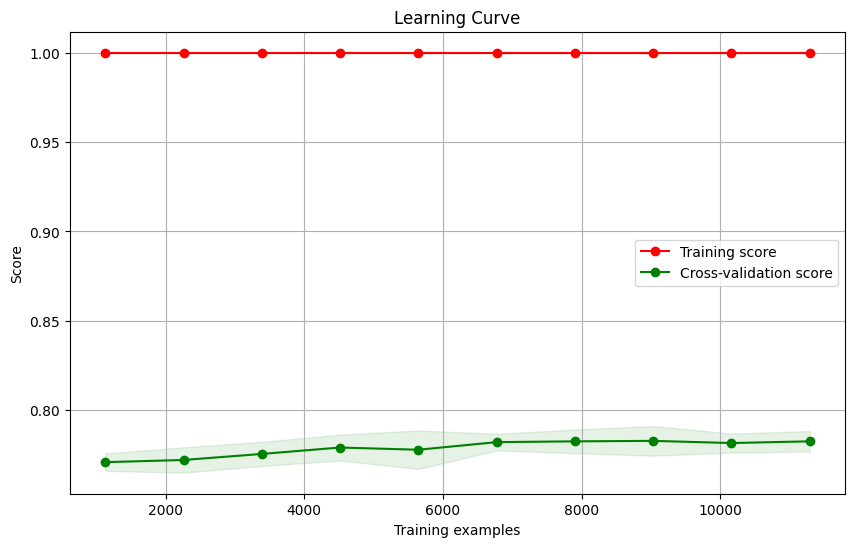

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_model, X_train_undersampled, y_train_undersampled, scoring, train_sizes)


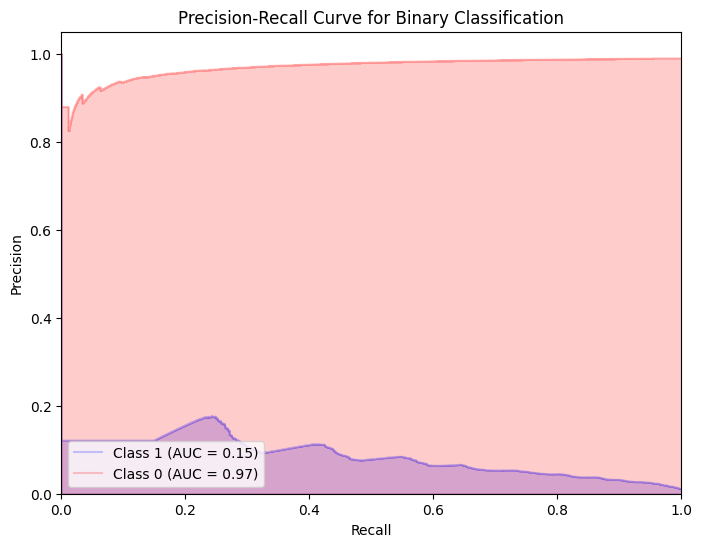

AUC Class 1: 0.1504
AUC Class 0: 0.9705


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_model.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_model.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_model.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.011583840731664182
Recall: 0.15035799522673032
[[156490   1834]
 [  1424    252]]


In [ ]:
### fixed until here:)

In [ ]:
#KNN CW
##import data = basic full

X_train_resampled = pd.read_csv('X_train_transformed_basicfull.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basicfull.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')

y_train_resampled = pd.read_csv('y_train_basicfull.csv')
y_valid = pd.read_csv('y_valid_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)



In [ ]:
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(X_train_resampled, y_train_resampled, test_size=0.5, random_state=42)

In [ ]:

# Define the class weights manually
weight_positive = 1 / 0.011  # 1/0.011 = 90.91
class_weight_dict = {0: 1, 1: weight_positive}

# Manually under-sample the majority class
# Assuming 0 is the majority class
majority_class_indices = y_train_tune[y_train_tune == 0].index
random_indices = np.random.choice(majority_class_indices, size=int(len(majority_class_indices) * 0.5), replace=False)

# Combine minority class indices with the randomly selected majority class indices
under_sampled_indices = np.concatenate([random_indices, y_train_tune[y_train_tune == 1].index])

X_train_re_sampled = X_train_tune.loc[under_sampled_indices]
y_train_re_sampled = y_train_tune.loc[under_sampled_indices]

y_train_re_sampled = y_train_re_sampled.values.ravel()

pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Fit the pipeline to the resampled data
pipeline.fit(X_train_re_sampled, y_train_re_sampled)

# Define the parameter grid
param_dist = {
    'knn__n_neighbors': randint(1, 20),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]  # Power parameter for Minkowski distance
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings sampled
    scoring='f1_macro',  # Use an appropriate scoring metric
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42
)

# Fit the random search to the data - full data
random_search.fit(X_train_re_sampled, y_train_re_sampled)

# Print the best hyperparameters
print("Best Hyperparameters KNN CW:", random_search.best_params_)

#fit the model on full data
best_params = random_search.best_params_
best_model = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=best_params['knn__n_neighbors'],
                                  weights=best_params['knn__weights'],
                                  p=best_params['knn__p']))
])

# Fit the final model on the full dataset
best_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_model.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_model, 'knn_class_weights.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time= 2.6min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time= 2.6min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time= 2.6min
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=39.5min
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=39.7min
[CV] END knn__n_neighbors=15, knn__p=1, knn__weights=distance; total time=39.6min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time= 2.6min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time= 2.6min
[CV] END .knn__n_neighbors=7, knn__p=2, knn__weights=uniform; total time= 2.6min
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=39.6min
[CV] END knn__n_neighbors=11, knn__p=1, knn__weights=distance; total time=39.4min
[CV] END knn__n_neighbors=11, knn__p=1, knn_

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-2e6e64aa6e9a>", line 63, in <cell line: 63>
    joblib.dump(best_model, 'knn_class_weights.pkl')
  File "/usr/local/lib/python3.10/dist-packages/joblib/numpy_pickle.py", line 552, in dump
    with open(filename, 'wb') as f:
OSError: [Errno 107] Transport endpoint is not connected: 'knn_class_weights.pkl'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packa

In [ ]:
#Best Hyperparameters KNN CW: {'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance'}

#best hyperparameters per search above
knn_hyperparameters = {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

#k-NN classifier
knn_model = KNeighborsClassifier(
    n_neighbors=knn_hyperparameters['n_neighbors'],
    p=knn_hyperparameters['p'],
    weights=knn_hyperparameters['weights']
)

In [ ]:
# Create a pipeline with k-NN
pipeline = Pipeline([
    ('knn', knn_model)
])

# Fit the model to your training data
# Assuming X_train is your training data and y_train is your training labels
best_model = pipeline.fit(X_train_resampled, y_train_resampled)

# Predict with the trained model
# Assuming X_test is your test data
y_pred = pipeline.predict(X_valid_transformed)

In [ ]:

joblib.dump(best_model, 'knn_class_weights.pkl')

['knn_class_weights.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5003


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9844


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[158317      7]
 [  1671      5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    158324
           1       0.42      0.00      0.01      1676

    accuracy                           0.99    160000
   macro avg       0.70      0.50      0.50    160000
weighted avg       0.98      0.99      0.98    160000



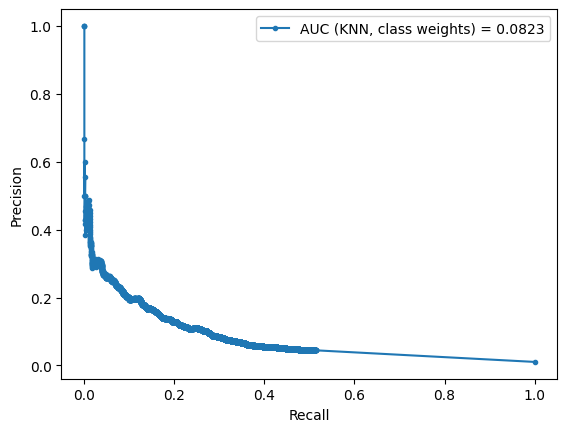

In [15]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_model.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (KNN, class weights) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


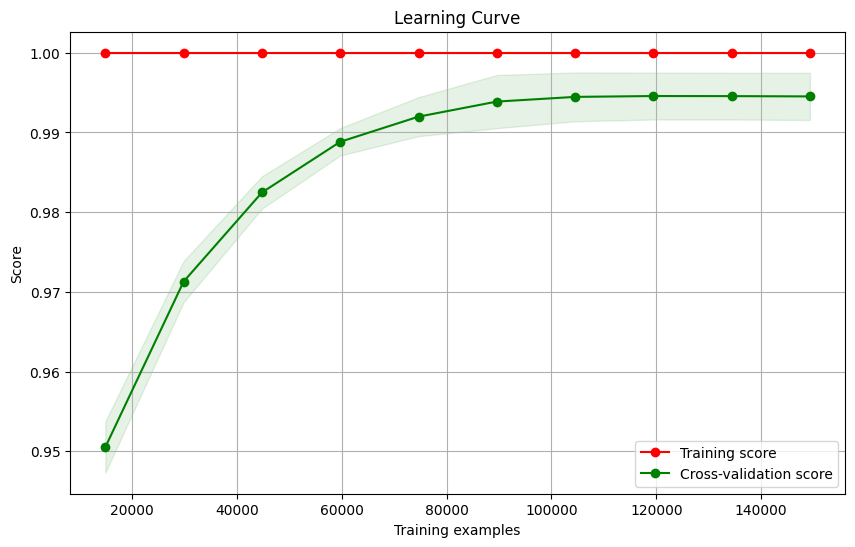

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_model, X_train_re_sampled, y_train_re_sampled, scoring, train_sizes)

In [20]:
#KNN best sampling (stratified undersampling) + TR data

X_train_resampled = pd.read_csv('X_train_undersampled_str_trans.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basic_trans.csv')

y_train_resampled = pd.read_csv('y_train_undersampled_str_trans.csv')
y_valid = pd.read_csv('y_valid_basic_trans.csv')


y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)



In [21]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [22]:
# Create a pipeline with a StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_dist = {
    'knn__n_neighbors': randint(1, 20),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]  # Power parameter for Minkowski distance
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings sampled
    scoring='f1_macro',  # Use an appropriate scoring metric
    cv=3,  # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters KNN:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters KNN: {'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance'}


In [23]:
joblib.dump(best_model, 'knn_trans_strat_undersampling')

['knn_trans_strat_undersampling']

In [24]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4504


In [25]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8331


In [26]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[115160  43164]
 [   302   1374]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84    158324
           1       0.03      0.82      0.06      1676

    accuracy                           0.73    160000
   macro avg       0.51      0.77      0.45    160000
weighted avg       0.99      0.73      0.83    160000



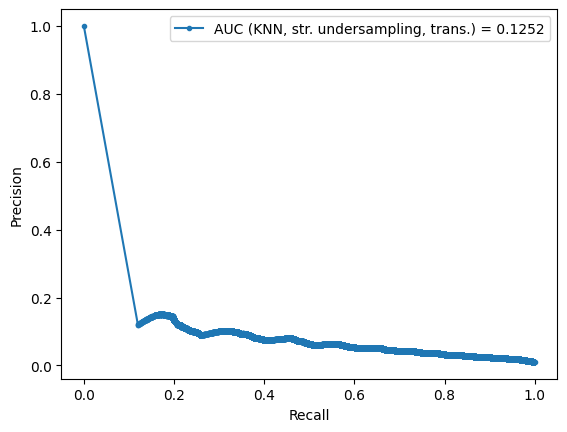

In [27]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_model.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (KNN, str. undersampling, trans.) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [28]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.84
Class 1: F1 Score = 0.06
Class accuracy: F1 Score = 0.73
Class macro: F1 Score = 0.45
Class weighted: F1 Score = 0.83


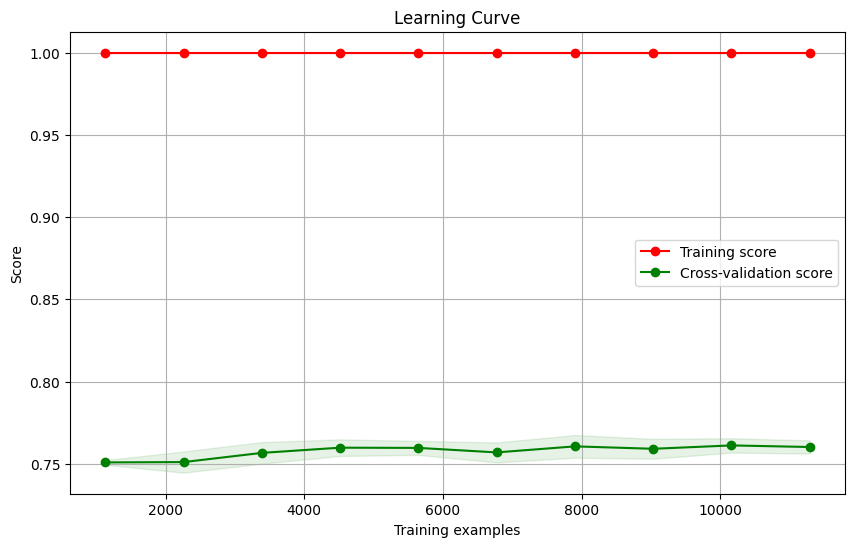

In [29]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_model, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##best model (str. undersampling) evaluated on test

In [30]:
best_model = joblib.load('knn_stratified_undersampl.pkl')

In [31]:
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
y_test = np.ravel(y_test.values)

In [33]:
y_pred = best_model.predict(X_test_transformed)

In [34]:
f1 = f1_score(y_test, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

f1 = f1_score(y_test, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

F1 Score: 0.4472
F1 Score: 0.8215
Confusion Matrix:
[[140456  57338]
 [   225   1981]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    197794
           1       0.03      0.90      0.06      2206

    accuracy                           0.71    200000
   macro avg       0.52      0.80      0.45    200000
weighted avg       0.99      0.71      0.82    200000



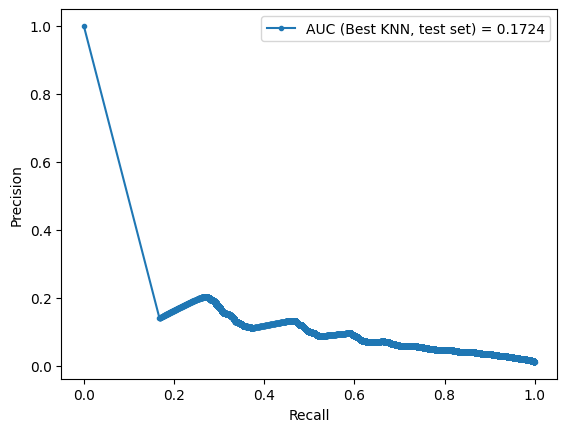

In [35]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_model.predict_proba(X_test_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_test, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Best KNN, test set) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


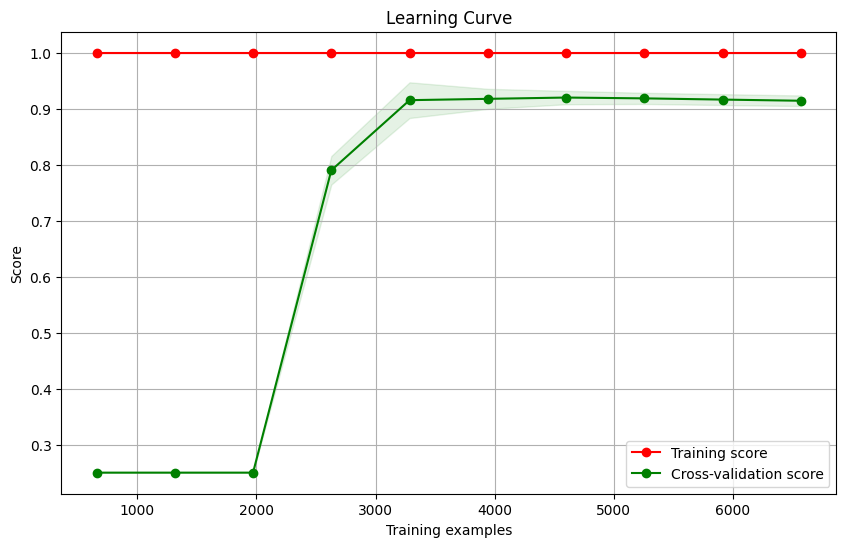

In [ ]:

train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_model, X_train_re_sampled, y_train_re_sampled, scoring, train_sizes)